In [10]:
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 36})
rc('text', usetex=True)

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import math
import functools

plt.rcParams.update({'font.size': 45})

def f(x):
    x1, x2 = x
    return 0.02*x1*x1 + 0.005*x2*x2

def L2(x):
    x1, x2 = x
    return math.sqrt(x1*x1 + x2*x2)

def grad1(x1):
    return 0.04*x1

def grad2(x2):
    return 0.01*x2

def grad(x):
    x1, x2 = x
    grad = np.array([0.04*x1, 0.01*x2])
    return grad

def hessian(x):
    hessian = np.array([[0.04, 0], [0, 0.01]])
    return hessian

In [11]:
time = int(300)
dpi=100
eps= 0.0001
p0 = [1,1,0,0]

t = np.linspace(0, time, time+1)

t2 = np.linspace(0, time, time*100+1)

In [12]:
#Calculate Nesterov's method
def Nesterov(time=time):
    Nes = np.zeros((time+1,2))
    Nes[0] = [1, 1]
    for k in range(time):
        if k==0:
            y = Nes[k]
        else:
            y = Nes[k] + (Nes[k]-Nes[k-1])* (k) / (k+3)
        Nes[k+1] = y -   grad(y)
    return Nes

Nes1 = Nesterov()

In [13]:
def Nesterov2(time=time, kmin=20):
    Nes = np.zeros((time+1,2))
    Nes[0] = [1, 1]
    j = 1
    for k in range(time):
        if k==0:
            y = Nes[k]
        else:
            y = Nes[k] + (Nes[k]-Nes[k-1])* (j) / (j+3)
        Nes[k+1] = y -  grad(y)
        if np.dot(Nes[k+1]-2*Nes[k]+Nes[k-1], Nes[k]-Nes[k-1]) < 0 and j>= kmin:
            j=1
        else:
            j=j+1
    return Nes
Nes2 = Nesterov2()

In [14]:
def Nesterov3(time=time, kmin=20):
    Nes = np.zeros((time+1,2))
    Nes[0] = [1, 1]
    j = 1
    for k in range(time):
        if k==0:
            y = Nes[k]
        else:
            y = Nes[k] + (Nes[k]-Nes[k-1])* (j) / (j+3)
        Nes[k+1] = y -  grad(y)
        if L2(Nes[k+1]-Nes[k]) < L2(Nes[k]-Nes[k-1])  and j>= kmin:
            j=1
        else:
            j=j+1
    return Nes
Nes3 = Nesterov3()

In [15]:
Nes1_func = np.apply_along_axis(f, 1, Nes1)
Nes2_func = np.apply_along_axis(f, 1, Nes2)
Nes3_func = np.apply_along_axis(f, 1, Nes3)

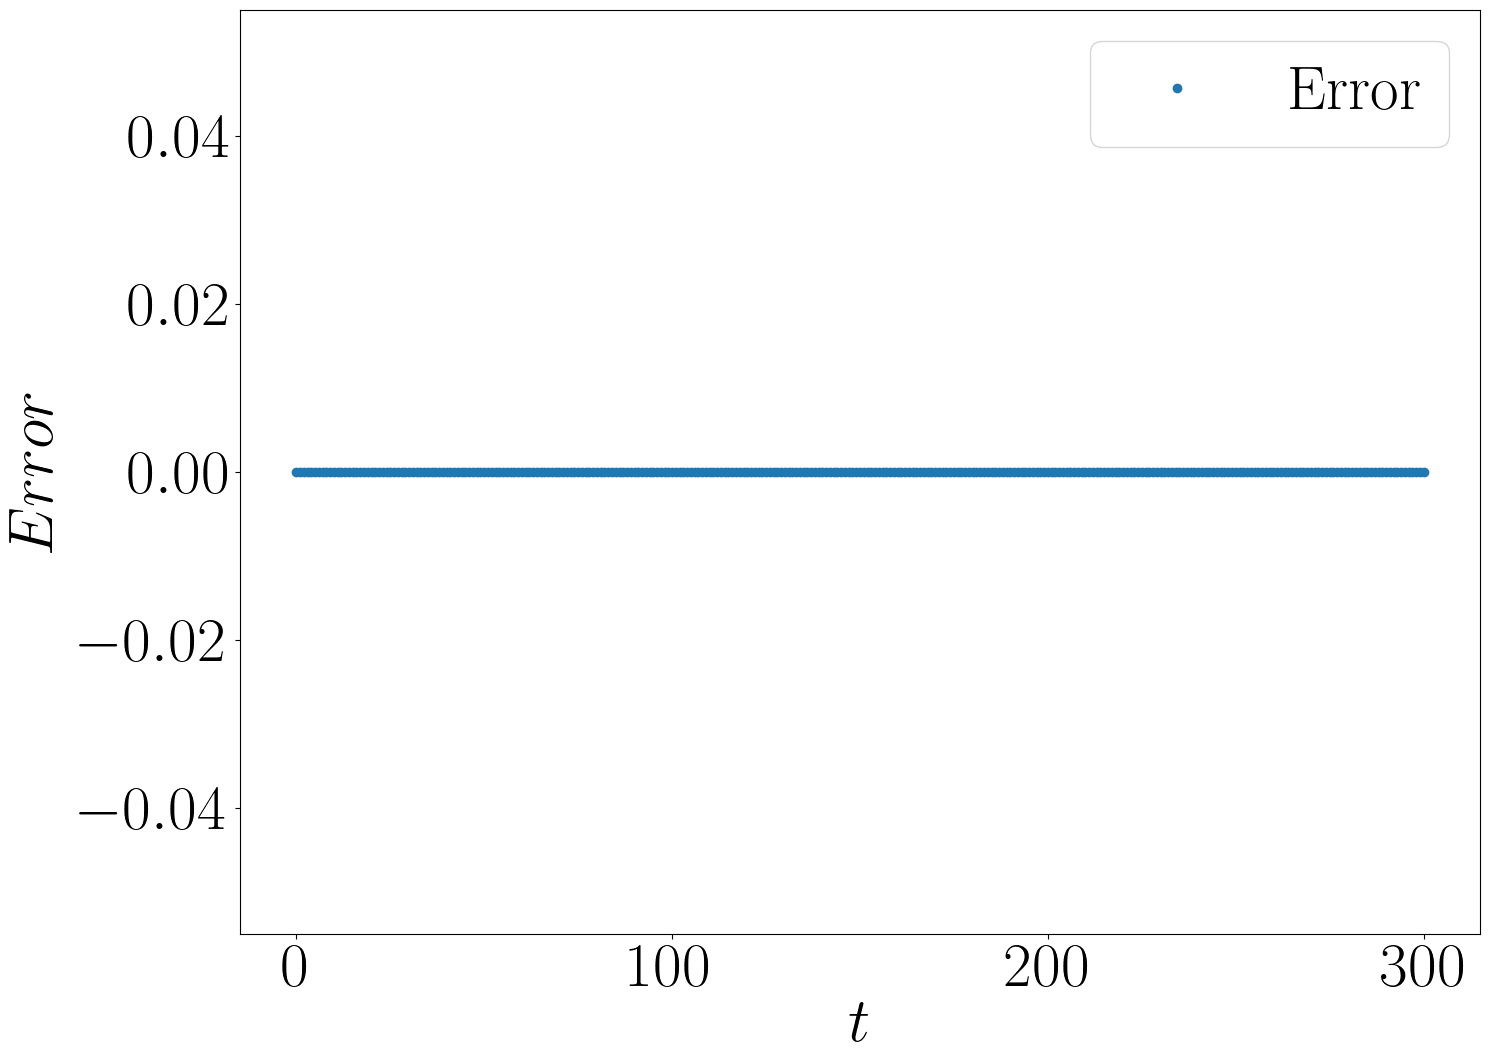

In [16]:
plt.figure(figsize=(16,12))
plt.plot(t, Nes2_func-Nes3_func, '.', label='Error', markersize=12)
plt.xlabel('$t$', labelpad=0)
plt.ylabel('$Error$', labelpad=10)
plt.legend()
plt.show()